In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("datathon_2024_dataset (1).csv")
df.head()

,Unnamed: 0,game_date,home_team,away_team,is_day_game,home_score,away_score,venue,venue_name,city,...,home_hbp,away_pa,away_1b,away_2b,away_3b,away_hr,away_fo,away_so,away_bb,away_hbp
0,0,20000329,NYN,CHN,False,3,5,TOK01,Tokyo Dome,Tokyo,...,1,38,5,1,0,1,24,4,3,0
1,1,20000330,CHN,NYN,False,1,5,TOK01,Tokyo Dome,Tokyo,...,1,44,5,0,0,0,24,9,6,0
2,2,20000403,ATL,COL,True,2,0,ATL02,Turner Field,Atlanta,...,0,32,5,0,0,2,17,6,1,1
3,3,20000403,CIN,MIL,True,3,3,CIN08,Cinergy Field,Cincinnati,...,0,20,3,1,0,1,10,4,1,0
4,4,20000403,FLO,SFN,False,6,4,MIA01,Sun Life Stadium,Miami,...,0,38,9,3,0,0,17,7,1,1


In [18]:
df.columns

Index(['Unnamed: 0', 'game_date', 'home_team', 'away_team', 'is_day_game',
       'home_score', 'away_score', 'venue', 'venue_name', 'city', 'state',
       'home_pa', 'home_1b', 'home_2b', 'home_3b', 'home_hr', 'home_fo',
       'home_so', 'home_bb', 'home_hbp', 'away_pa', 'away_1b', 'away_2b',
       'away_3b', 'away_hr', 'away_fo', 'away_so', 'away_bb', 'away_hbp'],
      dtype='object')

In [19]:
df["home_team"].unique()

array(['NYN', 'CHN', 'ATL', 'CIN', 'FLO', 'MON', 'SLN', 'ANA', 'BAL',
       'MIN', 'OAK', 'TEX', 'TOR', 'ARI', 'PIT', 'SEA', 'HOU', 'KCA',
       'TBA', 'COL', 'MIL', 'PHI', 'SDN', 'SFN', 'BOS', 'DET', 'NYA',
       'LAN', 'CHA', 'CLE', 'WAS', 'MIA'], dtype=object)

In [20]:
df[df["home_team"]=="HOU"]

,Unnamed: 0,game_date,home_team,away_team,is_day_game,home_score,away_score,venue,venue_name,city,...,home_hbp,away_pa,away_1b,away_2b,away_3b,away_hr,away_fo,away_so,away_bb,away_hbp
57,57,20000407,HOU,PHI,False,1,4,HOU03,Minute Maid Park,Houston,...,0,32,4,0,0,1,20,5,2,0
72,72,20000408,HOU,PHI,True,8,5,HOU03,Minute Maid Park,Houston,...,1,38,6,1,2,2,19,5,3,0
87,87,20000409,HOU,PHI,True,2,3,HOU03,Minute Maid Park,Houston,...,0,37,4,1,0,0,18,7,6,1
99,99,20000410,HOU,SLN,False,7,8,HOU03,Minute Maid Park,Houston,...,1,36,2,1,0,4,18,7,3,1
107,107,20000411,HOU,SLN,False,6,10,HOU03,Minute Maid Park,Houston,...,0,37,4,1,1,2,19,7,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56610,56610,20230919,HOU,BAL,False,5,9,HOU03,Minute Maid Park,Houston,...,1,39,5,2,0,3,16,9,3,1
56625,56625,20230920,HOU,BAL,True,2,1,HOU03,Minute Maid Park,Houston,...,0,34,3,2,0,0,13,10,5,1
56649,56649,20230922,HOU,KCA,False,5,7,HOU03,Minute Maid Park,Houston,...,2,41,3,2,1,2,19,8,6,0
56663,56663,20230923,HOU,KCA,False,2,3,HOU03,Minute Maid Park,Houston,...,0,37,3,2,0,1,20,7,3,1


In [55]:
home_home = {'win': 0, 'lose': 0, 'tie': 0}
home_away = {'win': 0, 'lose': 0, 'tie': 0}
away_home = {'win': 0, 'lose': 0, 'tie': 0}
away_away = {'win': 0, 'lose': 0, 'tie': 0}
astros = df[(df["home_team"] == 'HOU') | (df["away_team"] == 'HOU')]

In [56]:
for i in range(len(astros)-1):
    if astros.iloc[i]['home_team'] == 'HOU':
        if astros.iloc[i+1]['home_team'] == 'HOU':
            if astros.iloc[i+1]['home_score']>astros.iloc[i+1]['away_score']:
                home_home['win']+=1;
            elif astros.iloc[i+1]['home_score']<astros.iloc[i+1]['away_score']:
                home_home['lose']+=1;
            else:
                home_home['tie']+=1;
        else:
            if astros.iloc[i+1]['home_score']<astros.iloc[i+1]['away_score']:
                home_away['win']+=1;
            elif astros.iloc[i+1]['home_score']>astros.iloc[i+1]['away_score']:
                home_away['lose']+=1;
            else:
                home_away['tie']+=1;
    elif astros.iloc[i]['away_team'] == 'HOU':
        if astros.iloc[i+1]['home_team'] == 'HOU':
            if astros.iloc[i+1]['home_score']>astros.iloc[i+1]['away_score']:
                away_home['win']+=1;
            elif astros.iloc[i+1]['home_score']<astros.iloc[i+1]['away_score']:
                away_home['lose']+=1;
            else:
                away_home['tie']+=1;
        else:
            if astros.iloc[i+1]['home_score']<astros.iloc[i+1]['away_score']:
                away_away['win']+=1;
            elif astros.iloc[i+1]['home_score']>astros.iloc[i+1]['away_score']:
                away_away['lose']+=1;
            else:
                away_away['tie']+=1;

In [57]:
home_home

{'win': 884, 'lose': 721, 'tie': 0}

In [58]:
away_away

{'win': 755, 'lose': 854, 'tie': 1}

In [59]:
home_away

{'win': 144, 'lose': 141, 'tie': 0}

In [60]:
away_home

{'win': 157, 'lose': 128, 'tie': 0}

In [87]:
win = [0]*home_home['win'] + [1]*home_away['win'] + [2]*away_home['win'] + [3]*away_away['win']
lose = [0]*home_home['lose'] + [1]*home_away['lose'] + [2]*away_home['lose'] + [3]*away_away['lose']
tie = [0]*home_home['tie'] + [1]*home_away['tie'] + [2]*away_home['tie'] + [3]*away_away['tie']

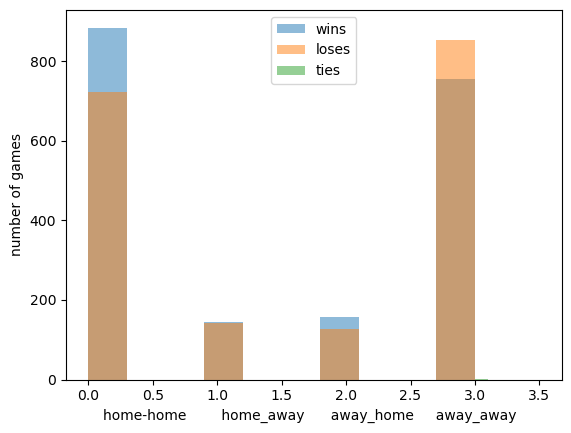

In [96]:
plt.hist(win, alpha = 0.5, label = "wins")
plt.hist(lose, alpha = 0.5, label = "loses")
plt.hist(tie, alpha = 0.5, label = "ties")
plt.legend()
plt.xlabel('home-home        home_away      away_home     away_away  ')
plt.ylabel('number of games');